## Gradient Descent and its Ubiquity in Machine Learning

In this notebook, we introduce the gradient descent algorithm which is far and away the most popular optimization algorithm in machine learning. Before we can talk about things like "optimization" or "machine learning" however, we need to define what exactly we mean by these terms and in particular how they are used in this notebook. We formulate these ideas from the ground up, and assume only a working knowledge of the material covered in an introductory Calculus course. Our primary motivation for this is provide clarity in technical machine learning contexts and to disambiguate the wide variety of popular buzzwords which pervade the field in a context which is as accessible as possible to those who wish to learn.

With that, we begin by asking a very basic question and immediately providing a very basic answer:

#### What is machine learning?

One answer to this question - and the one which we will use as our working definition to guide our intuition - is that machine learning is nothing more than a particular mathematical and/or computational model which makes predictions about new data based on optimizations "learned" from previous data sets. As many useful answers do, this characterization immediately provides motivation for our next question: 

#### What does it mean for a model or a machine to "learn"?

It is at this point that we narrow our focus by providing some measure of technical precision; while the idea of generalized learning machines has inspired decades of fantastic science fiction and stimulates rich discussion in philosophy and ethics to this day, it is somewhat far afield of what we will accomplish in this notebook. Instead, we provide a more constrained yet still intuitive proposition: a machine "learns" by way of an iterative learning process which by some algorithm or another (spoiler: that algorithm will predominantly be gradient descent) changes parameters in a model in response to data in order to make increasingly accurate predictions about some aspect of that data. In short, we wish to optimize - and in particular maximize - the accuracy with which our model can make predictions.

This definition provides some immediate direction regarding some things we might need in order to create a learning machine. The following items turn out to form a fairly complete list of the pieces we need in order to create our iterative learning process:

- A predictive model with parameters which we can tune.
- Some sort of measure of the accuracy of the predictions that our model makes.
- An iterative algorithm which adjusts model parameters in order to move our model closer to its maximum accuracy.

In general, the exact nature of these three components will greatly depend both on the problem we're looking to solve as well as the data set with which we are working. We can, however, formulate some helpful restrictions about the behavior of these components.

We encounter the first of these by examining just a bit more closely what exactly we mean by our measure of accuracy. Because the space of possible predictions in a model is often near endless, one finds that any attempt to directly compare one prediction against all other possible predictions is at best computationally expensive and at worst completely futile (imagine trying to measure how good you are at darts by comparing against all the places that you _didn't_ hit). We can further convince ourselves that trying somehow to optimize that accuracy be for all practical purposes an impossible endeavour except perhaps under very exceptional circumstances.

For this reason, we instead take a rather simpler approach - we simply measure how different the data is from our model's prediction. We call this error our **loss function** (also often referred to as an **objective function**; these two terms are commonly interchanged, so it is good to become comfortable with using them interchangeably) and a moment's consideration should convince the reader that our model's _maximum accuracy_ is attained when our error is as small as possible - i.e., when the loss function attains its _minimum value_. This insight is critical, as it provides the foundation for our learning machines and captures in a general sense what a learning model is.

We have now established in a broad sense the requirements for candidates for our loss function. We wish for this function to compare model predictions to actual data, and to output some non-negative value which serves as a measure of the error (or the loss) of the model's prediction. One simple loss function we could use would be to simply take the absolute value of the difference between the values predicted by our model and the values in the data set:

$$ L = | \textbf{x}_{predicted} - \textbf{x}_{data} | $$ 

However, because we wish to minimize that error, we further want our loss function to be differentiable in such a way that we can find the extrema of the loss function. We also want as few extrema as possible (ideally only ever one) in the loss function so that we have some guarantee that our model isn't only accurate in some local area of the data set. A common way to achieve both of these desired behaviors while retaining an intuitive sense of accuracy in the loss function is to divide the square of the difference between each predicted value $\bar{x}_i$ and its corresponding actual value $x_i$ in the data set by the number of elements $n$ in the set. In doing so, our loss function becomes the mean squared error (MSE) function:

$$ L = \frac{1}{n}\sum\limits_{i=0}^{n}{\left( \bar{x}_i - x_i \right)^2} $$

This function quite pleasantly only has a single extreme point, which is a minimum; one consequence of this fact is that we can _always_ find a minimum for this particular loss function - in other words, given a particular model paired with this loss function, optimizing this loss function will _always yield an optimal prediction within some neighborhood of our predictive model_. It is extremely important to keep in mind, however, that this optimal prediction is not necessarily a _global_ minimum and that optimizing this loss function does not guarantee that we achieve the best possible accuracy; finding global extrema is in fact a quite non-trivial field of study within machine learning. The data generated in this notebook is not prone to this problem of local optimization, and so we defer the study of this problem to a later workshop.

Now that we have a loss function with all sorts of desirable behaviors, we can talk about how to minimize this function via gradient descent.

#### The Gradient Descent Algorithm

Our goal in general is to minimize a loss function for a particular model. Because we chose a well-behaved (i.e., differentiable) loss function to work with, we can go about this without a great deal of theoretical development. Recall that the gradient in general represents a direction of greatest change of a function (in one dimension - which is where we will work initially - the gradient simply reduces to taking the derivative of a function). The point in which we are interested is precisely the opposite; that is, we are looking for a neighborhood in which there is as _little_ change as possible. The approach we take to minimizing the loss function then is to calculate the gradient of the loss function with respect to whatever parameters our particular model contains and then to proceed in _exactly the opposite direction_ which the gradient indicates is the direction of maximum change. The following example shows this process for the function $y = x^2$, whose gradient is $\nabla y = 2x$:

<IPython.core.display.Javascript object>


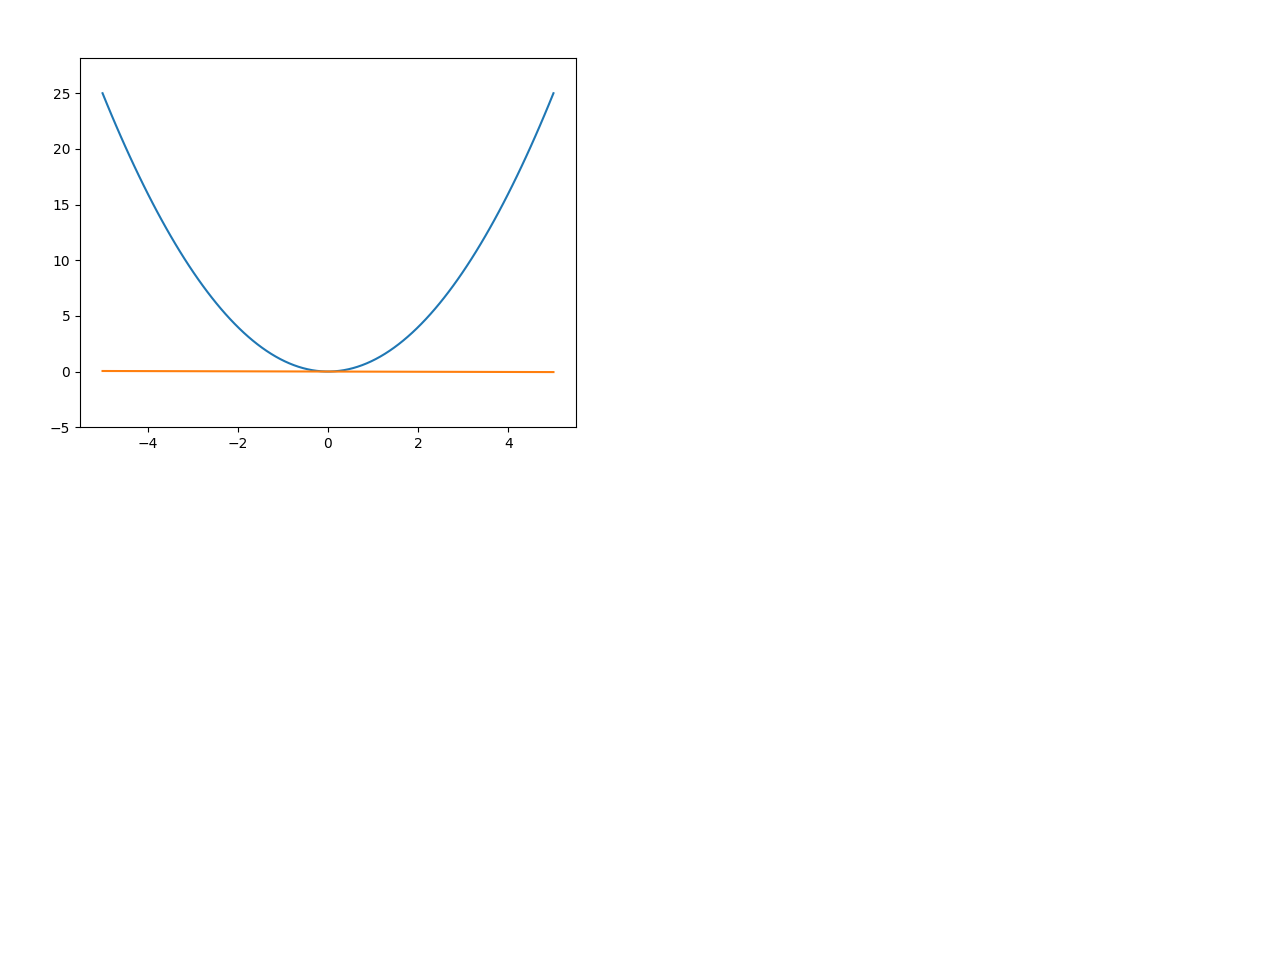

We converged to our specified tolerance in 61 iterations!


In [1]:
# We import a few different libraries that make our work a bit easier.
# We also give them each aliases (the part after "as") which make them
# a little easier to remember; the ones shown below are those used 
# most commonly, but you can call these whatever you want! This practice
# is quite prevalent in Python as a whole, and doubly so in data science.
#
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
import time

# Don't worry about these lines - they are specific to Jupyter and make
# the animation work.
#
%matplotlib notebook
plt.ion()
fig, ax = plt.subplots()

# Plot y=x^2
#
x = np.linspace(-5, 5, 100)
y = x ** 2
ax.plot(x, y)


# We make our first (bad) guess at x = -8 for our minimum.
#
min_x_guess = -3

# Calculate our initial gradient; remember that we're trying
# to make this number as close to 0 as possible, which indicates
# that we've found a minimum.
#
gradient = 2 * min_x_guess

# We're going to say that we've found our minimum once our
# gradient is less than this value. This should always be
# some amount greater than zero, since we'll never achieve
# perfect accuracy unless we're utilizing an analytic solution.
#
acceptable_min_gradient = 0.01

# We'll be plotting our gradient function as dx vs. dy
#
dx = np.linspace(-5, 5)
dy = gradient * dx - (min_x_guess ** 2)
z, = ax.plot(dx, dy)

ax.set_ylim(bottom=-5)


# This value indicates how much we should change our current
# best guess in response to the gradient. Try changing this
# value to observe the effect of this value on the model's
# learning. A word of warning - if you set it to one or more,
# your predictions will actually diverge (and you'll need to
# restart this notebook :).
#
learning_rate = 0.05

# Run until the absolute value of the gradient is close to zero
# or we hit 1000 iterations.
#
for i in range(1000):
    if abs(gradient) < acceptable_min_gradient:
        print('We converged to our specified tolerance in {} iterations!'.format(i))
        break
        
    # Set new guess for minimum x - this is the learning step!
    #
    min_x_guess = min_x_guess - (learning_rate * gradient)
    
    # Calculate the new gradient and corresponding line
    #
    gradient = 2 * min_x_guess
    dy = gradient * dx - (min_x_guess ** 2)
    
    # Plot new line values - don't worry too much about this part;
    # this is just to run the animation.
    #
    z.set_ydata(dy)
    
    fig.canvas.draw()
    fig.canvas.flush_events()
    
    # Comment out this line if you want to see how fast this can converge!
    time.sleep(0.05)

#### Learning a Model - Combining Gradient Descent with a Loss Function

Now that we have two big tools in our toolbox, we're finally ready to train our very own model! We're going to start simple by randomly generating some data that's pretty close to linear. This will serve as our practice data set.

Recall that the last item on our learning machine list is the model itself. In general, this choice should be driven by the nature of the data set; some data sets lend themselves more naturally to models which are designed to detect anomalous data, others toward neural network models, and yet others to data clustering models. Since we're working with data which is linear, we're going create a learning machine which models the generated data set by a linear function. Our model is then simply the equation for a line (we replace the standard $m$ and $b$ notation with $\theta_1$ and $\theta_2$ respectively in order to emphasize the fact that these are the values which we can learn in response to our calculated gradient):

$$ y_{predicted} = \theta_1 x + \theta_2 $$


From this, we can formulate our mean squared error function from above as the function upon which we perform gradient descent in order to optimize; recall that $(x_i, y_i)$ represents each point from our data set and that $\bar{y}_i$ represents the _predicted_ value corresponding to $x_i$:

$$ 
\begin{align*}
L &= \frac{1}{n}\sum\limits_{i=0}^{n}{\left( \bar{y}_i - y_i \right)^2} \\
  &= \frac{1}{n}\sum\limits_{i=0}^{n}{\left((\theta_1 x_i + \theta_2) - y_i \right)^2}
\end{align*}
$$


Since we want to adjust both the slope and y-intercept, our gradient must differentiate with respect to the parameters we wish to learn, i.e., our model's learned slope $\theta_1$ and y-intercept $\theta_2$:

$$
\begin{align}
    \nabla y_{predicted} = \begin{pmatrix}
        \frac{\partial L}{\partial \theta_1} \\ \frac{\partial L}{\partial \theta_2}
    \end{pmatrix} = \begin{pmatrix}
        \frac{1}{n}\sum\limits_{i=0}^{n}{2 \left( (\theta_1 x_i + \theta_2) - y_i \right) x_i} \\
        \frac{1}{n}\sum\limits_{i=0}^{n}{2 \left( (\theta_1 x_i + \theta_2) - y_i \right)}
    \end{pmatrix}
\end{align}
$$

To recapitulate our progress thus far, we have at this point created a model (a line) which we think stands a good chance of fitting our data set (which we know will, of course - we generated the data set from a line, after all!), and we then derived an objective (loss) function by plugging our model into the mean squared error function. We then calculated the gradient of that loss function with respect to the parameters we wish to change in order to minimize the loss function. We are therefore now ready to apply the gradient descent algorithm to our model and see how it performs!

<IPython.core.display.Javascript object>


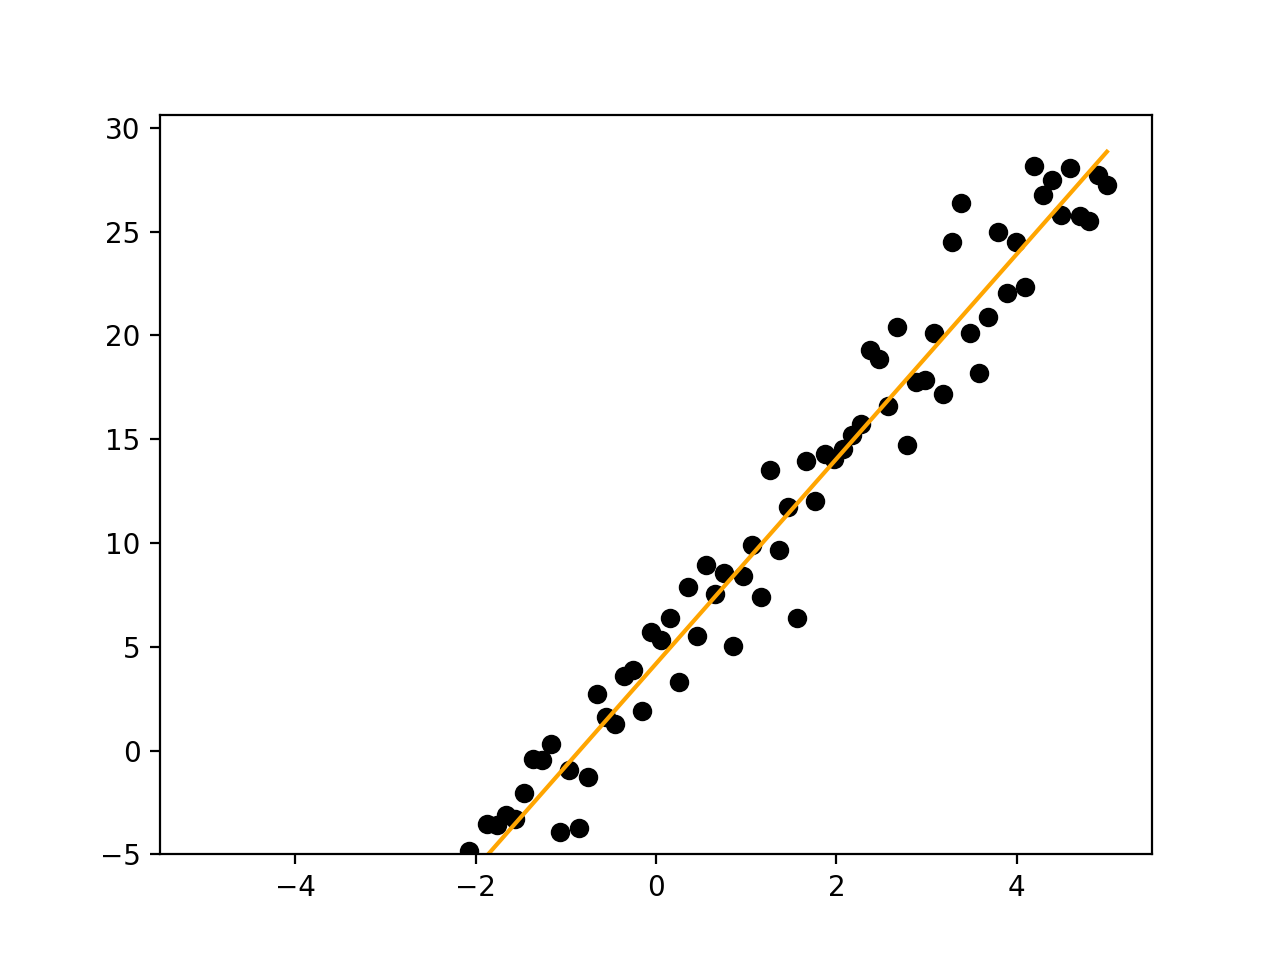

We converged to our specified tolerance in 42 iterations!


<IPython.core.display.Javascript object>


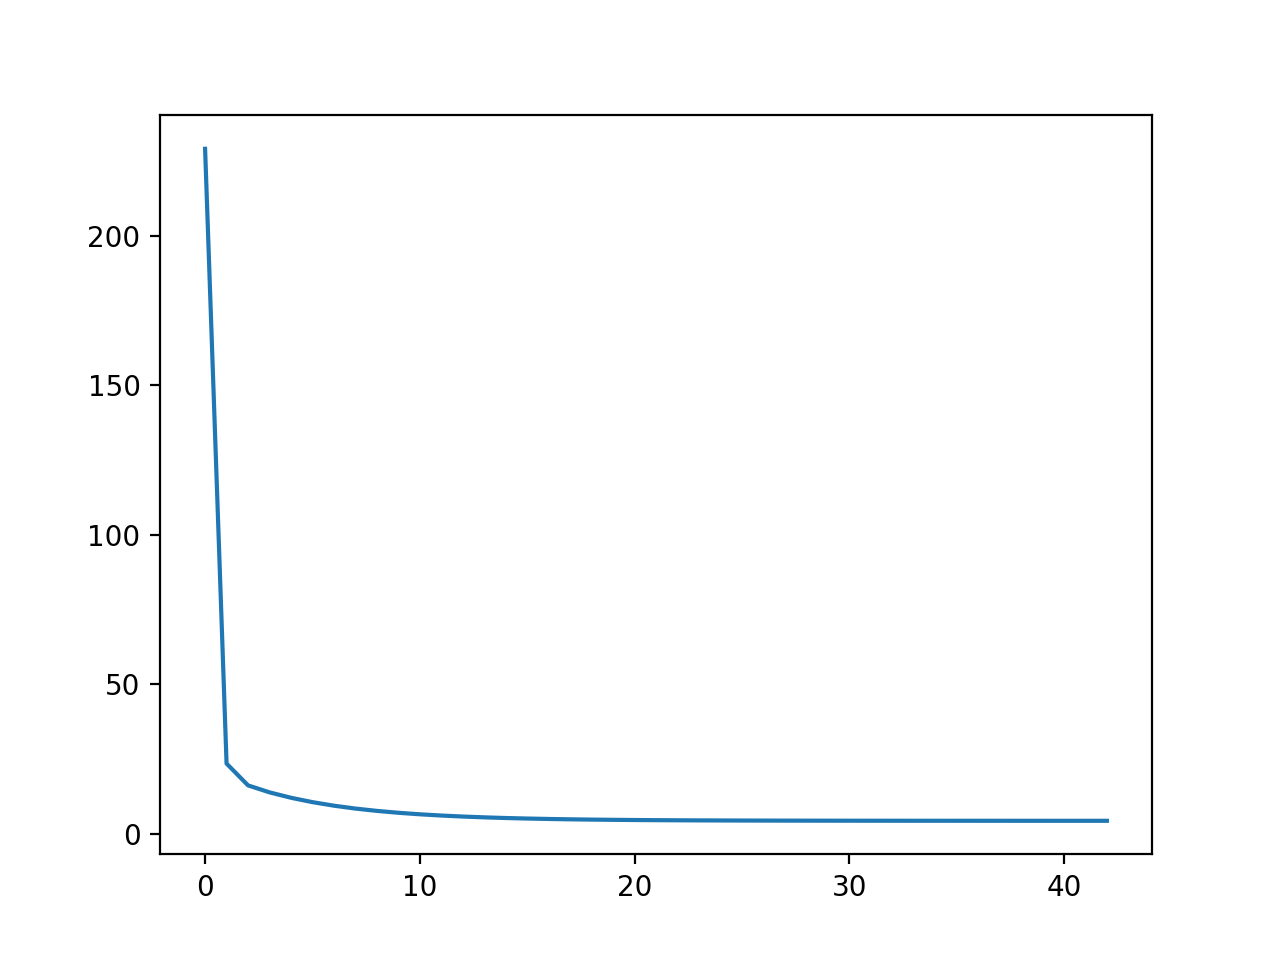

In [44]:
# Don't worry about these lines - they are specific to Jupyter and make
# the animation work.
#
%matplotlib notebook
plt.ion()
fig, ax = plt.subplots()

left_xlim = -5
right_xlim = 5

# We'll use some random integers to create a line from which we
# generate test data.
# This code generates the scatter plot from which we'll learn
# parameters (slope and y-intercept, in our case) for our model.
#
[m, b] = np.random.randint(1, 10, size=2)
x = np.linspace(left_xlim, right_xlim, 100)[:, np.newaxis]
y = m * x + b + (2 * np.random.randn(100, 1))
ax.scatter(x, y, color='black')

# We'll make our first (terrible) guess to be the line y = 0.
#
theta_1 = 0
theta_2 = 0

# Since our gradient calculation is a bit non-trivial, we're
# going to put that calculation into its own function. This
# code is nothing more than the gradient function defined
# above.
#
def calculate_gradient(slope, intercept, x_vals, y_vals):
    # Calculate mean standard error gradient
    #
    abs_error = (slope * x_vals + intercept) - y_vals
    d_slope = np.sum(2 * abs_error * x_vals) / len(x_vals)
    d_intercept = np.sum(2 * (abs_error)) / len(x_vals)
    
    # Calculate mean standard error value
    #
    mse = np.sum(np.power(abs_error, 2)) / len(x_vals)
    
    return (d_slope, d_intercept, mse)

    
# Calculate initial gradient and error values.
#
dtheta_1, dtheta_2, err = calculate_gradient(theta_1, theta_2, x, y)
loss_old = err
loss_val=loss_old

# We're going to say that we've found our minimum once the
# mean squared error falls below this value. Decreasing this
# will cause the algorithm to run longer but possibly find a
# better fit, and increasing this will decrease the number of
# iterations performed at the expense of model accuracy.
#
convergence_error_threshold = 0.1

# Plot our model function - it'll initially just be a horizontal line.
#
y_predicted = theta_1 * x + theta_2
z, = ax.plot(x, y_predicted, color='orange')

ax.set_ylim(bottom=-5)

# We're going to say that we've found our minimum once our
# gradient is less than this value. This should always be
# some amount greater than zero, since we'll never achieve
# perfect accuracy unless we're utilizing an analytic solution.
#
acceptable_min_gradient = 0.1

# Run until the absolute value of the gradient is close to zero
# or we hit 1000 iterations.
#
for i in range(1000):
        
    # Set new guesses for theta_1 and theta_2 - this is the learning
    # step.
    #
    theta_1 = theta_1 - (learning_rate * dtheta_1)
    theta_2 = theta_2 - (learning_rate * dtheta_2)
    
    # Calculate the new gradient and corresponding line
    #
    dtheta_1, dtheta_2, err = calculate_gradient(theta_1, theta_2, x, y)
    y_predicted = theta_1 * x + theta_2
    
    # Plot new line values - as before, these lines are mostly for
    # animation purposes.
    #
    z.set_ydata(y_predicted)
    
    fig.canvas.draw()
    fig.canvas.flush_events()
    
    # Comment out this line if you want to see how fast this can converge!
    time.sleep(0.05)
    
    if max(abs(dtheta_1), abs(dtheta_2)) < acceptable_min_gradient:
        print('We converged to our specified tolerance in {} iterations!'.format(i))
        break
        
    # One could also use a different termination condition, based on the value of the loss function 
    # not changing much from iteration to iteration
    
#     acceptable_min_delta_loss = 0.005*loss_new
    
#     loss_new = err
    
#     if abs(loss_new-loss_old) < acceptable_min_delta_loss:
#         print('We converged to our specified tolerance in {} iterations!'.format(i))
#         break
    
#     loss_old = loss_new
    
    loss_val= np.append(loss_val, err)
    
    
plt.figure()
plt.plot(loss_val)
    

## Supplement: A quick Introduction to Stochastic Gradient Descent

In this suplementary section, we introduce the powerful idea of stochastic gradient descent. At each iteration  (learning step) we compute the gradient direction based on a subset of the data, which we call the training data, rather than on the entire data set. Thus, the decrease in the loss fsunction is not guaranteed at each iteration. This may seem like a disadvantage at first, since there may be more iterations needde to achieve the same level of accuracy, but there is interesting theory to back up such a strategy which benefits from decrease in the compute required, and also it assures avoiding the possibility of overfitting the data.

<IPython.core.display.Javascript object>


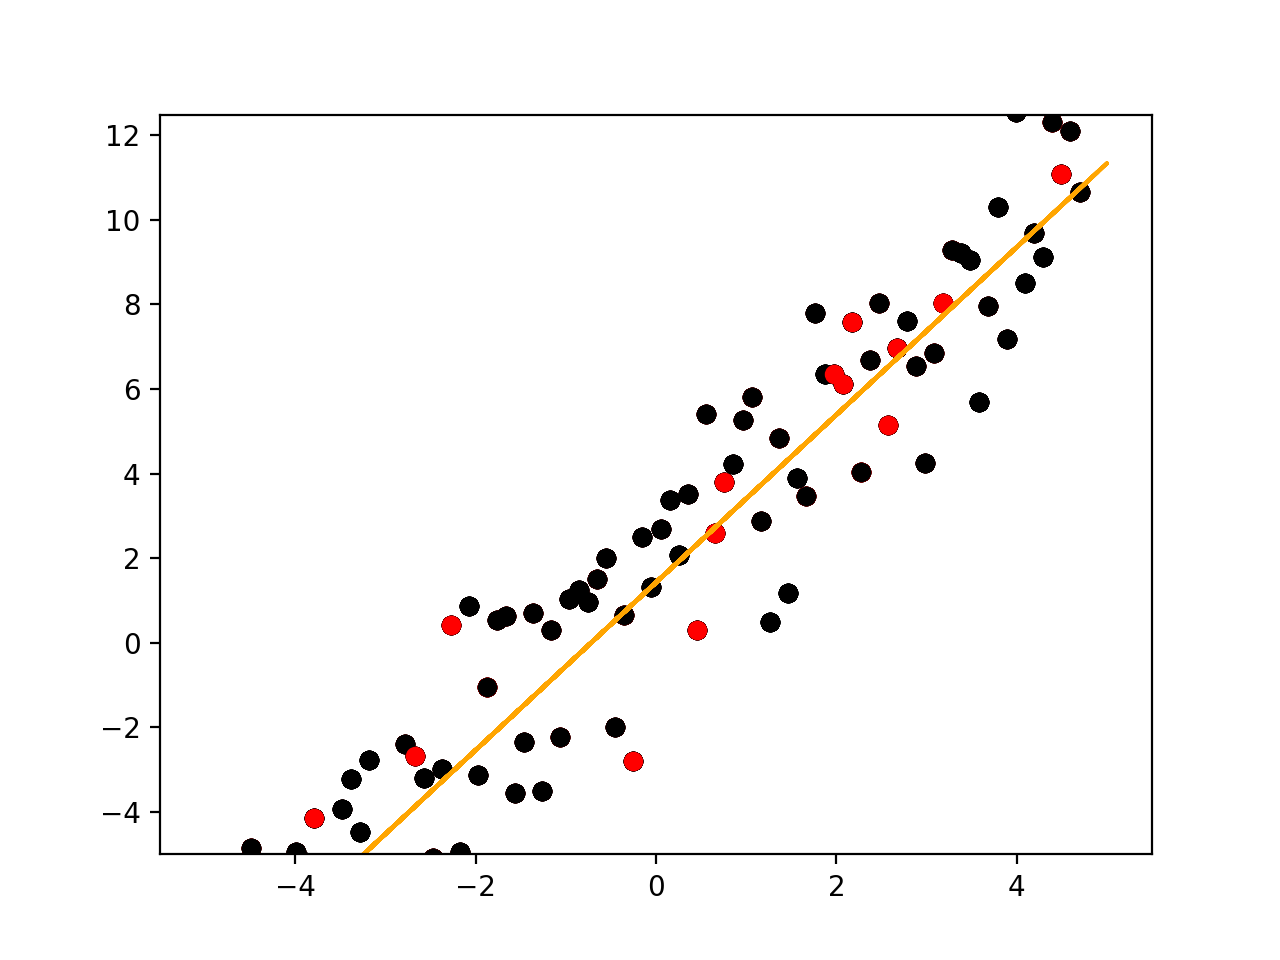

We converged to our specified tolerance in 13 iterations!


<IPython.core.display.Javascript object>


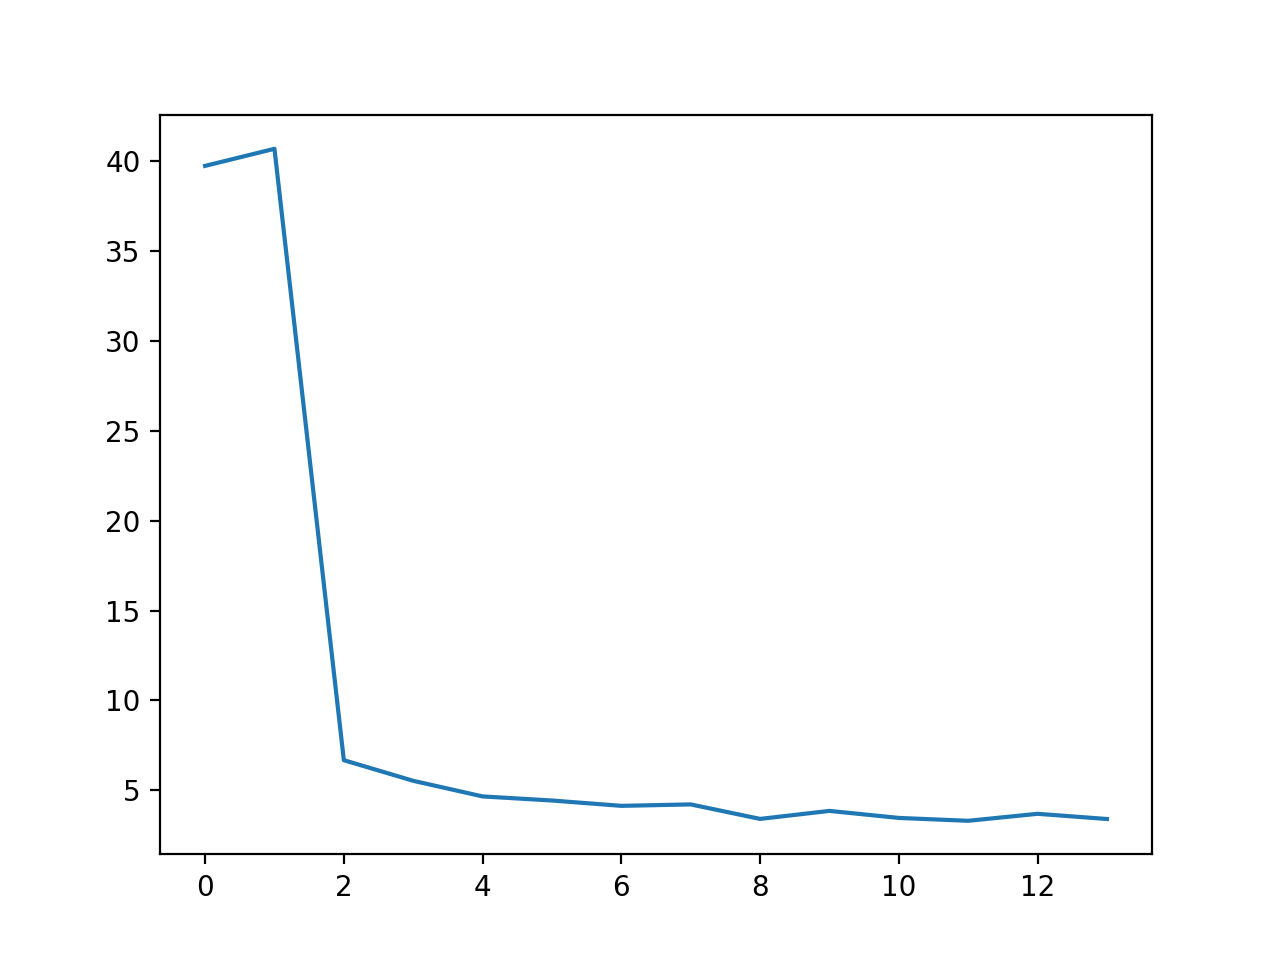

In [42]:
# First, we import a tool to split the data into the training data (used to compute the gradient direction)
# and the testing data (which can be used for validation, although it will not happen here)

from sklearn.model_selection import train_test_split

# The next few lines of code simply are reproduced from the gradient descent cell above, as initiating the steps
%matplotlib notebook
plt.ion()
fig, ax = plt.subplots()

theta_1 = 0
theta_2 = 0

dtheta_1, dtheta_2, err = calculate_gradient(theta_1, theta_2, x, y)
convergence_error_threshold = 0.1
y_train_predicted = theta_1 * x + theta_2
z, = ax.plot(x, y_predicted, color='orange')

ax.set_ylim(bottom=-5)

loss_old = err
loss_val=loss_old

# Now is the iterative step, where at each iteration we split the data.

for i in range(1000):
    
    x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.15)

    ax.scatter(x_train, y_train, color='black')
    ax.scatter(x_test, y_test, color='red')
    
    # Calculate the new gradient and corresponding line based on the training data only
    
    dtheta_1, dtheta_2, err = calculate_gradient(theta_1, theta_2, x_train, y_train)
          
    theta_1 = theta_1 - (learning_rate * dtheta_1)
    theta_2 = theta_2 - (learning_rate * dtheta_2)
    
    y_train_predicted = theta_1 * x_train + theta_2
    
    # Plot new line values - as before, these lines are mostly for
    # animation purposes.
    #
    z.set_xdata(x_train)
    z.set_ydata(y_train_predicted)
    
    fig.canvas.draw()
    fig.canvas.flush_events()
    
    # Comment out this line if you want to see how fast this can converge!
    time.sleep(0.01)
    
    # For the termination condition, we need to compute the value of the loss function
    # and also set the acceptable min loss change
    
    loss_new = err

    acceptable_min_delta_loss = 0.005*loss_new
    
    if abs(loss_new-loss_old) < acceptable_min_delta_loss:
        print('We converged to our specified tolerance in {} iterations!'.format(i))
        break
           
    loss_old = loss_new       

    loss_val= np.append(loss_val, loss_old)
    
plt.figure()
plt.plot(loss_val)


#### Alternative Loss Functions

In this final section of the notebook, we turn things over to you to derive and code up a gradient function for the mean squared logarithmic error (MSLE) function, which is very similar to the mean squared error function we've already worked with. While the MSE function heavily penalizes significant data outliers (since that loss function increases as the square of the difference between data points), the MSLE function relaxes that penalty a fair amount by taking the square of the difference of the _logarithm_ of the data points:

$$ 
\begin{align*}
L_{MSLE} &= \frac{1}{n}\sum\limits_{i=0}^{n}{\left( \ln{\bar{y}_i} - \ln{y_i} \right)^2} \\
  &= \frac{1}{n}\sum\limits_{i=0}^{n}{\left(\ln{(\theta_1 x_i + \theta_2)} - \ln{y_i} \right)^2}
\end{align*}
$$

We've outlined the code below and denoted the section into which you should encode the gradient which you derive:

<IPython.core.display.Javascript object>


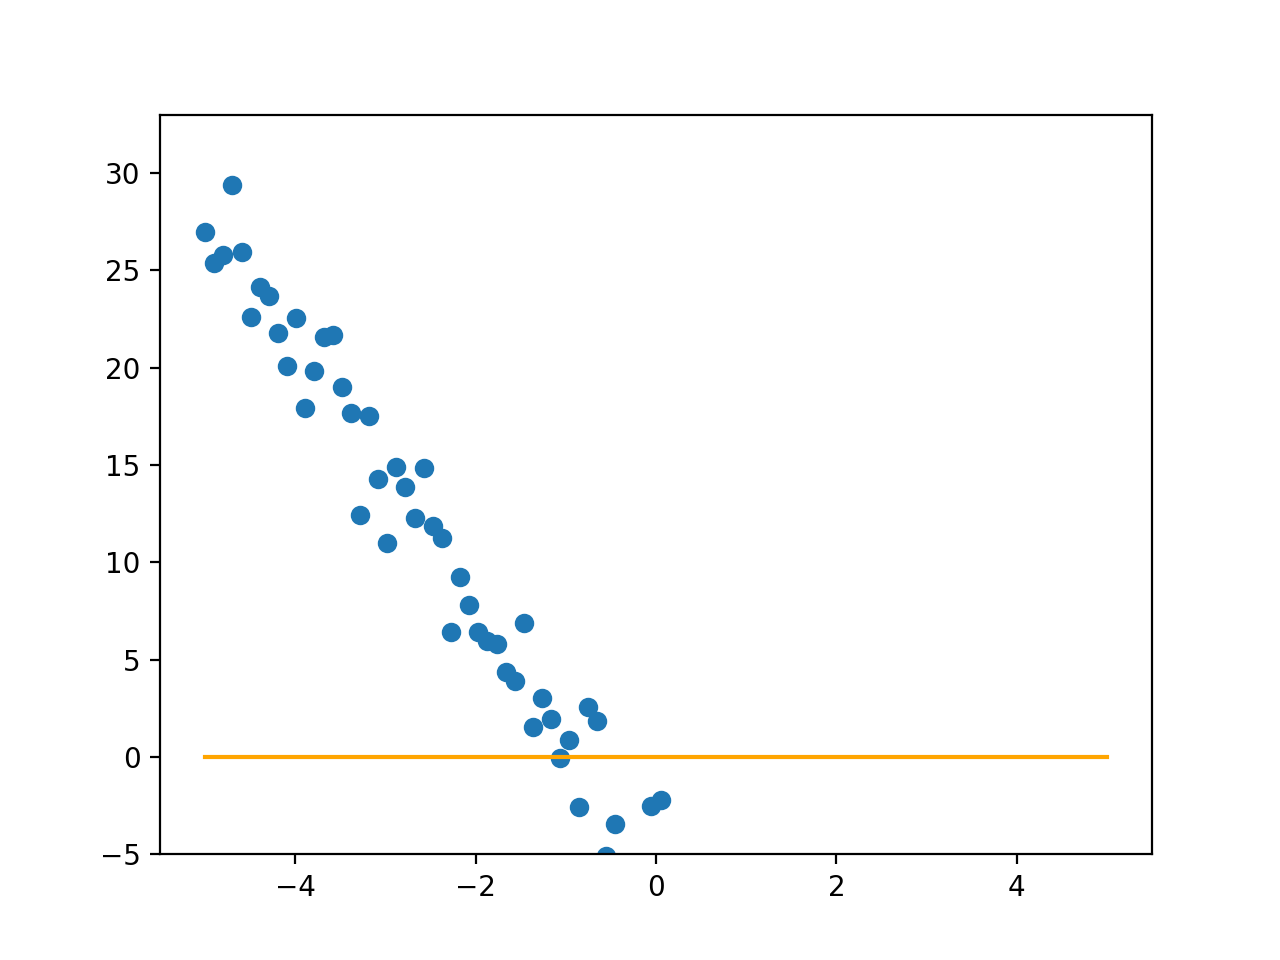

We converged to our specified tolerance in 0 iterations!


In [45]:
%matplotlib notebook
plt.ion()
fig, ax = plt.subplots()

left_xlim = -5
right_xlim = 5

[m, b] = np.random.randint(1, 10, size=2) * np.random.choice([-1,1])
x = np.linspace(left_xlim, right_xlim, 100)[:, np.newaxis]
y = m * x + b + (2 * np.random.randn(100, 1))
ax.scatter(x, y)

theta_1 = 0
theta_2 = 0

# This is where you should encode the gradient of your loss function.
#
def calculate_gradient(slope, intercept, x_vals, y_vals):
    # Calculate mean standard logarithmic error gradient.
    # np.log() is your friend!
    #
    abs_error = 0
    d_slope = 0
    d_intercept = 0
    
    # Calculate mean standard logarithmic error value
    #
    msle = np.sum(np.power(abs_error, 2)) / len(x_vals)
    
    return (d_slope, d_intercept, msle)
    
dtheta_1, dtheta_2, err = calculate_gradient(theta_1, theta_2, x, y)
convergence_error_threshold = 0.1
y_predicted = theta_1 * x + theta_2
z, = ax.plot(x, y_predicted, color='orange')

ax.set_ylim(bottom=-5)

acceptable_min_gradient = 0.01

for i in range(1000):
    if max(abs(dtheta_1), abs(dtheta_2)) < acceptable_min_gradient:
        print('We converged to our specified tolerance in {} iterations!'.format(i))
        break
        
    theta_1 = theta_1 - (learning_rate * dtheta_1)
    theta_2 = theta_2 - (learning_rate * dtheta_2)
    
    dtheta_1, dtheta_2, err = calculate_gradient(theta_1, theta_2, x, y)
    y_predicted = theta_1 * x + theta_2
    
    z.set_ydata(y_predicted)
    
    fig.canvas.draw()
    fig.canvas.flush_events()
    
    # Comment out this line if you want to see how your loss function converges;
    # it should converge somewhat slower than the MSE!
    time.sleep(0.05)